In [ ]:
# This section is for preprocessing the data

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data file
df = pd.read_csv("homeEconomy.csv")
BachelorRate, HomeOwnerRate, HouseholdMedianIncome = [], [], []
NumEmployee, AvgRent, GDP, Commute = [], [], [], []
df = df.iloc[:,:df.shape[1]-1]
# Extract all data into their coresspond features
for i in range(df.shape[0]):
    BachelorRate.append(df.iloc[i, 1])
    HomeOwnerRate.append(df.iloc[i, 2])
    HouseholdMedianIncome.append(df.iloc[i, 3])
    NumEmployee.append(df.iloc[i, 4])
    AvgRent.append(df.iloc[i, 5])
    GDP.append(df.iloc[i, 6])
    Commute.append(df.iloc[i, 7])


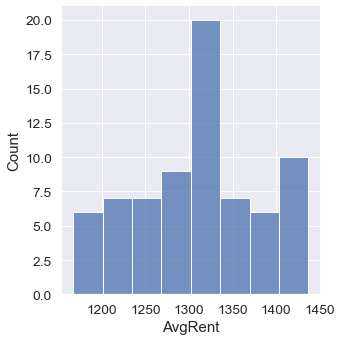

In [ ]:
# Collecting the dataset value
sns.displot(df["AvgRent"])


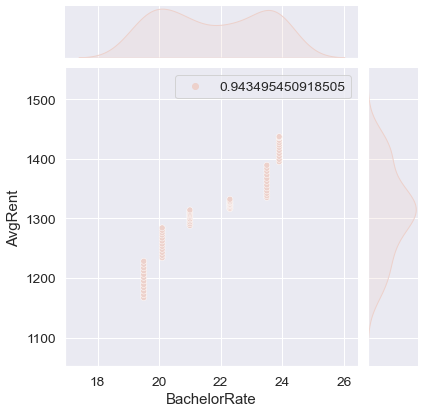

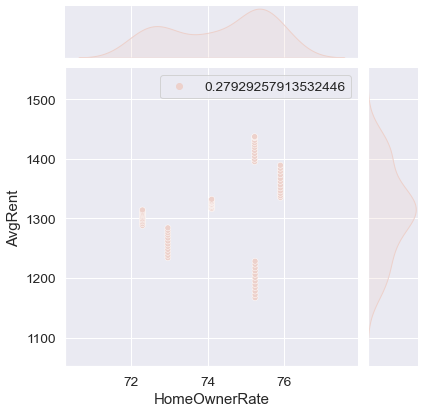

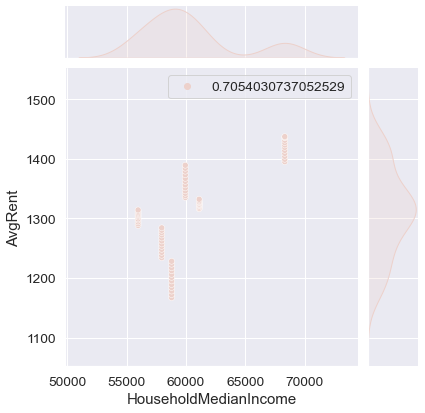

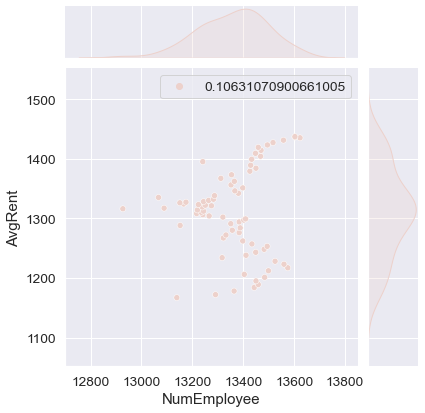

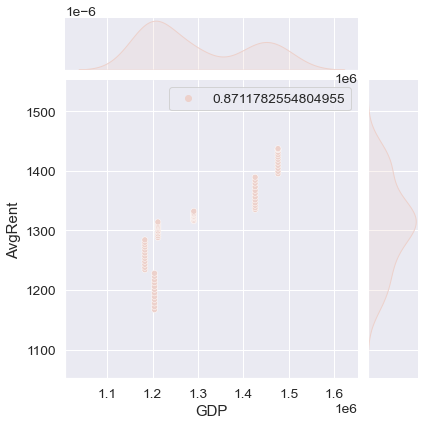

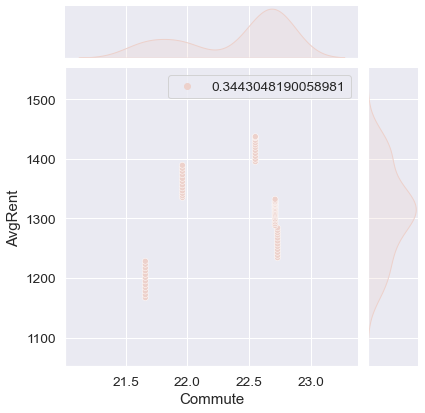

In [ ]:
# The relationship between each feature and the output value
sns.jointplot(x="BachelorRate", y="AvgRent", data=df, hue=stats.pearsonr(np.array(BachelorRate), np.array(AvgRent))[0])
sns.jointplot(x="HomeOwnerRate", y="AvgRent", data=df, hue=stats.pearsonr(np.array(HomeOwnerRate), np.array(AvgRent))[0])
sns.jointplot(x="HouseholdMedianIncome", y="AvgRent", data=df, hue=stats.pearsonr(np.array(HouseholdMedianIncome), np.array(AvgRent))[0])
sns.jointplot(x="NumEmployee", y="AvgRent", data=df, hue=stats.pearsonr(np.array(NumEmployee), np.array(AvgRent))[0])
sns.jointplot(x="GDP", y="AvgRent", data=df, hue=stats.pearsonr(np.array(GDP), np.array(AvgRent))[0])
sns.jointplot(x="Commute", y="AvgRent", data=df, hue=stats.pearsonr(np.array(Commute), np.array(AvgRent))[0])


Populating the interactive namespace from numpy and matplotlib


/Users/zhekaidong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


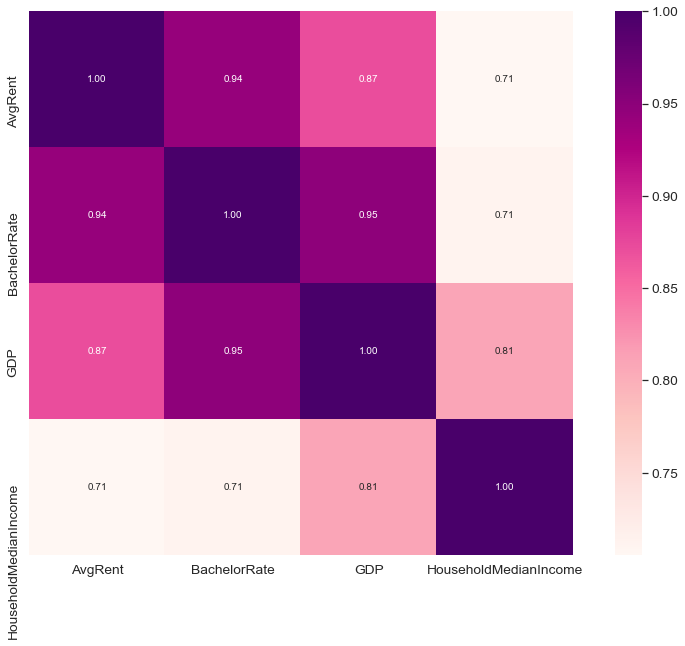

In [ ]:
%pylab inline

k = 4

pylab.rcParams["figure.figsize"] = (15, 10)

corrmatrix = df.corr()

col = corrmatrix.nlargest(k, "AvgRent")["AvgRent"].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)

cm1 = df[col].corr()
hm2 = sns.heatmap(cm1, square=True, annot=True, cmap="RdPu", fmt="0.2f", annot_kws={"size":10})

In [ ]:
# Create a subset of dataframe that contain the useful columns made by above matrix

df = df[['BachelorRate', 'GDP', 'HouseholdMedianIncome', 'Commute', 'AvgRent']]
df.head()

,BachelorRate,GDP,HouseholdMedianIncome,Commute,AvgRent
0,19.5,1204350,58792,21.66,1167
1,19.5,1204350,58792,21.66,1172
2,19.5,1204350,58792,21.66,1178
3,19.5,1204350,58792,21.66,1184
4,19.5,1204350,58792,21.66,1189


In [ ]:
# This section is for predicting the result

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

# This loop is to create the number of sample folds for the dataset, i is the test row the rest are train row
totaledt, totalerf, totaleab, totalelr = 0, 0, 0, 0
for i in range(df.shape[0]):
    if i == 0:
        X_train = df.iloc[1:df.shape[0], :df.shape[1]-1]
        X_test = df.iloc[0:1, :df.shape[1]-1]
        Y_train = df.iloc[1:df.shape[0], df.shape[1]-1:]
        Y_test = df.iloc[0:1, df.shape[1]-1:]
    elif i == df.shape[0]-1:
        X_train = df.iloc[0:df.shape[0]-1, :df.shape[1]-1]
        X_test = df.iloc[df.shape[0]-1:, :df.shape[1]-1]
        Y_train = df.iloc[0:df.shape[0]-1, df.shape[1]-1:]
        Y_test = df.iloc[df.shape[0]-1:, df.shape[1]-1:]
    else:
        X_df1 = df.iloc[0:i, :df.shape[1]-1]
        X_df2 = df.iloc[i+1:df.shape[0], :df.shape[1]-1]
        X_train = pd.concat([X_df1, X_df2])

        X_test = df.iloc[i:i+1, :df.shape[1]-1]

        Y_df1 = df.iloc[0:i, df.shape[1]-1:]
        Y_df2 = df.iloc[i+1:df.shape[0], df.shape[1]-1:]
        Y_train = pd.concat([Y_df1, Y_df2])

        Y_test = df.iloc[i:i+1, df.shape[1]-1:]

    
    # The following code is for the machine learning algorithm
    
    # Decision Tree
    mdt = tree.DecisionTreeClassifier(max_depth=15, random_state=4)
    mdt.fit(X_train, Y_train)

    pdt = mdt.predict(X_test)
    # print("Answer is:", ans)
    # Get the average absolute error
    edt = abs(pdt-Y_test.iloc[0,0])
    
    # print("The absolute error for folds", i, "is", edt[0], "The correct answer is", df.iloc[i, df.shape[1]-1])
    
    totaledt += edt[0]
    
    # Random forest
    
    mrf = RandomForestClassifier(max_depth=10, random_state=3)
    mrf.fit(X_train, Y_train.values.ravel())

    prf = mrf.predict(X_test)
    # Get the average absolute error
    erf = abs(prf-Y_test.iloc[0,0])
    
    # print("The absolute error for folds", i, "is", err[0])
    
    totalerf += erf[0]
    
    # Adaboost
    
    mab = AdaBoostClassifier(n_estimators=300, random_state=2)
    mab.fit(X_train, Y_train.values.ravel())

    pab = mab.predict(X_test)
    
    # Get the average absolute error
    eab = abs(pab-Y_test.iloc[0,0])
    
    # print("The absolute error for folds", i, "is", err[0])
    
    totaleab += eab[0]
    
    # Linear Regression
    
    mlr = LinearRegression()
    mlr.fit(X_train, Y_train.values.ravel())

    plr = mlr.predict(X_test)
    
    # Get the average absolute error
    elr = abs(plr-Y_test.iloc[0,0])
    
    # print("The absolute error for folds", i, "is", err[0])
    
    totalelr += elr[0]
    
    if i == df.shape[0]-1:
        print("The Average Error for decision tree is", totaledt/(i+1))
        print("The optimum hyper parameter for decision tree is 'max depth' = 15 and 'random state' = 4")
        
        print("The Average Error for random forest is", totalerf/(i+1))
        print("The optimum hyper parameter for random forest is 'max depth' = 10 and 'random state' = 3")

        print("The Average Error for Adaboost is", totaleab/(i+1))
        print("The optimum hyper parameter for Adaboost is 'number of estimators' = 300 and 'random state' = 2")
        
        print("The Average Error for linear regression is", totalelr/(i+1))
        
        # Combine all prediction results from the four methods 
        # Calculate the average value
        
        pred = (pdt + prf + pab + plr) / 4
        error = (totaledt/(i+1) + totalerf/(i+1) + totaleab/(i+1) + totalelr/(i+1)) / 4
        ratio = pred[0] / Y_test.iloc[0, 0]
        print(Y_test.iloc[0, 0])
        print("The prediction result is", pred[0], "The average error is", error)
        print("The ratio between predict value and the correct value is", ratio)

The Average Error for decision tree is 21.48611111111111
The optimum hyper parameter for decision tree is 'max depth' = 15 and 'random state' = 4
The Average Error for random forest is 16.25
The optimum hyper parameter for random forest is 'max depth' = 10 and 'random state' = 3
The Average Error for Adaboost is 22.958333333333332
The optimum hyper parameter for Adaboost is 'number of estimators' = 300 and 'random state' = 2
The Average Error for linear regression is 13.637219811655171
1437
The prediction result is 1407.745634812702 The average error is 18.582916064024904
The ratio between predict value and the correct value is 0.9796420562370926


In [ ]:
# Cities in Texas

citiesDF = pd.read_csv("texasEconomy.csv")
print(citiesDF.shape[0])
predPrice = []
for row in range(citiesDF.shape[0]):
    pred = 0
    test = np.array(citiesDF.iloc[row:row+1, 1:5]).reshape(1, -1)
    pred += mdt.predict(test)
    pred += mrf.predict(test)
    pred += mab.predict(test)
    pred += int(mlr.predict(test))
    predPrice.append(pred)

for item in predPrice:
    temp = int(item)
    temp /= 4
    item = temp
    
for i in range(len(predPrice)):
    predPrice[i] -= 3000
    
print()
print(predPrice)
print()

priceDifference = []
price = []
for row in range(citiesDF.shape[0]):
    rate = predPrice[row] - citiesDF.iloc[row, citiesDF.shape[1]-1:]
    priceDifference.append(rate[0])
    price.append(citiesDF.iloc[row, citiesDF.shape[1]-1:][0])
    print("Price difference for", citiesDF.iloc[row, 0:1],"is", rate[0])
print(priceDifference)
print(price)

4

[array([1920]), array([1561]), array([1458]), array([1815])]

Price difference for Cities    Houston
Name: 0, dtype: object is 715
Price difference for Cities    Austin
Name: 1, dtype: object is -58
Price difference for Cities    San Antonio
Name: 2, dtype: object is 307
Price difference for Cities    Dallas
Name: 3, dtype: object is 432
[715, -58, 307, 432]
[1205, 1619, 1151, 1383]


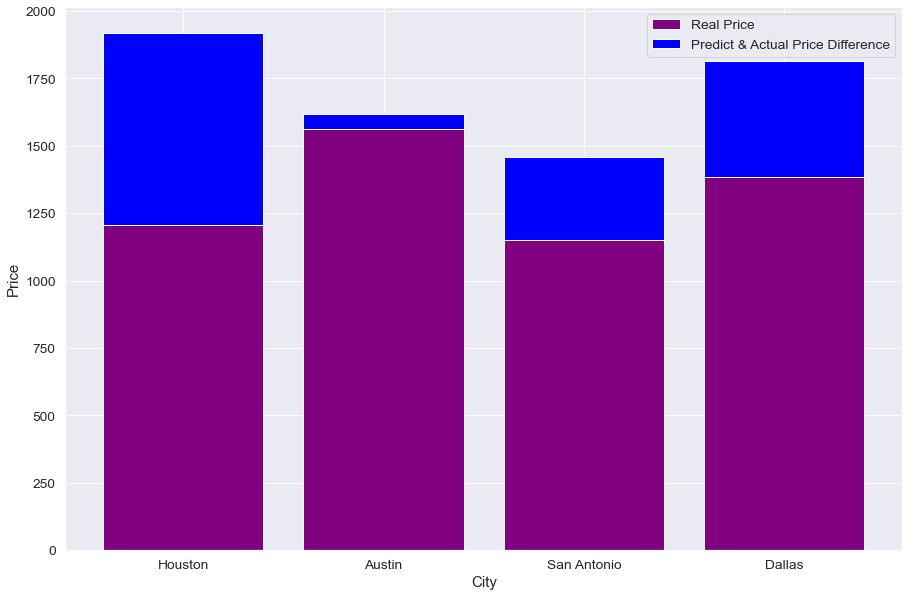

In [ ]:
# Plot

citynames = ['Houston', 'Austin', 'San Antonio', 'Dallas']

plt.bar(citynames, price, color='purple', label='Real Price')
plt.bar(citynames, priceDifference, bottom=price, color='blue', label='Predict & Actual Price Difference')
plt.xlabel('City')
plt.ylabel('Price')
plt.legend()
plt.show()
